In [ ]:
#@title
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

In [ ]:
import networkx as nx
import pandas as pd
from collections import Counter
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
import random
import colorlover as cl
from IPython.display import HTML
import matplotlib.pyplot as plt
init_notebook_mode(connected=True)
from nrclex import NRCLex
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.data import find
import re
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# df1 = pd.read_csv("tweets2009-06.txt.gz",
#                   sep ='\t',
#                   error_bad_lines = False,
#                   compression ='gzip')

In [ ]:
# df = pd.DataFrame(columns=['date', 'user', 'tweet'])
# df['date'] = df1.iloc[::3, :].values.flatten()
# df['user'] = df1.iloc[1::3, 0].str.split('/').str[-1].values.flatten()
# df['tweet'] = df1.iloc[2::3,:].values.flatten()

In [ ]:
!unzip tweets2009-06-0115.csv.zip

Archive:  tweets2009-06-0115.csv.zip
replace tweets2009-06-0115.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
df = pd.read_csv("tweets2009-06-0115.csv", sep='\t')

In [ ]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


## **Q1**

my chosen tag is #eric

In [ ]:
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [ ]:
hashTagsCounter.most_common(150)

In [ ]:
ericTag = df[df["tweet"].str.lower().str.contains("#eric", na=False)].copy()

## **Q2**

# (a)


In [ ]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [ ]:
addMentionedColumn(ericTag)

In [ ]:
# for all the tweets with your hashtag, build the mention graph
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [ ]:
ericGraph = mentionGraph(ericTag)

In [ ]:
print("# nodes:", len(ericGraph.nodes()))
print("# edges:", len(ericGraph.edges()))

# nodes: 157
# edges: 283


# (b)

In [ ]:
eric_degrees = ericGraph.degree()
degree_values = [v for k, v in eric_degrees]
max(degree_values)

67

Text(0, 0.5, 'Frequency')

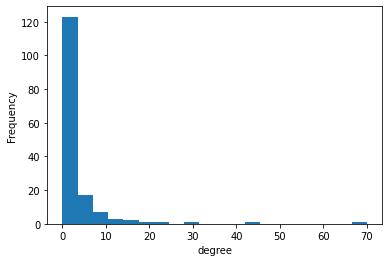

In [ ]:
plt.hist(degree_values, bins=20, range=(0,70))
plt.xlabel("degree")
plt.ylabel("Frequency")

majority of the nodes have very small number of degree.There exists some nodes that contain numerous degree. the highest degree is 67

# (c)

In [ ]:
c = Counter(degree_values)
fraction = [(i,c[i]/len(degree_values)) for i in c]
x = [ fraction[i][0] for i in range(len(fraction))]
y = [ fraction[i][1] for i in range(len(fraction))]

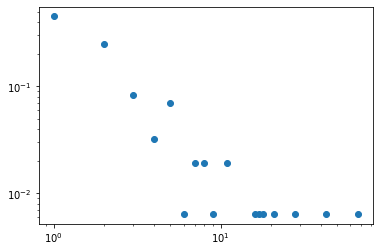

In [ ]:
plt.xscale('log')
plt.yscale('log')
plt.scatter(x,y)
plt.show()

it does exist a power law trend.

# (d)

In [ ]:
numMentions = 0 
pair =[]
for (n1,n2) in ericGraph.edges():
    temp = ericGraph[n1][n2]['numberMentions']
    if temp > numMentions:
        numMentions = ericGraph[n1][n2]['numberMentions']
        pair = [n1,n2]

In [ ]:
print(pair)
print(numMentions)

['siahoney', 'veronicadlcruz']
20


In [ ]:
temp = ericTag[ericTag['user'] == 'siahoney']
for index, tweet_data in temp.iterrows():
    if 'veronicadlcruz' in tweet_data['mentioned'] :
        print(tweet_data['tweet'])

listen 2 @VeronicaDLCruz on talk radio 4 #eric http://tinyurl.com/m4lwb8 www.tweet4eric.com
RT@TheRealDJamesRT @VeronicaDLCruz Pix o/Penguins jersey http://twitpic.com/7656k http://twitpic.com/76586 I kno #ERIC s going to LOVE this
RT@TheRealDJamesRT @VeronicaDLCruz Pix o/Penguins jersey http://twitpic.com/7656k http://twitpic.com/76586 I kno #ERIC s going to LOVE this
RT @VeronicaDLCruz: Hi friends, back from the hospital and it was another long & hard day. #Eric is not doing so well right now.
RT @VeronicaDLCruz: #ERIC He's been really struggling to breathe, so they intubated him again. He's back on a breathing respirator.
RT @VeronicaDLCruz: They also havent been able to stop the bleeding and they are very worried. So tomorrow morning they will scope him #eric
RT @eratyptin: @VeronicaDLCruz Im sad 2 hear this news, but Im keeping positive and keeping #Eric in my prayers that his condition improves
RT @LBCShopper: @VeronicaDLCruz I am going to include #eric & ur family in my prayers.

In [ ]:
temp = ericTag[ericTag['user'] == 'veronicadlcruz']
for index, tweet_data in temp.iterrows():
    if 'siahoney' in tweet_data['mentioned'] :
        print(tweet_data['tweet'])

RT @siahoney: new @VeronicaDLCruz update on #eric @ http://tweet4eric.com/ still waiting for docs to explain #eric situation


Siahoney @ veronicadlcrus many times to talk about eric with HashTag #eric

# (e)

In [ ]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [ ]:
def plotNetworkSizeColor(graph):
    closenessCentr = nx.closeness_centrality(ericGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Closeness: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
def applyLayout(graph, layoutFunc):
    posDict = layoutFunc(graph) 
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [ ]:
ericGraphSpring = ericGraph.copy()
applyLayout(ericGraphSpring, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor(ericGraphSpring)

## **Q3**


# (a)

In [ ]:
def getTopKWords(df, kwords):
    stop = set(stopwords.words('english'))
    counter = Counter()

    tweets = df['tweet'].values

    for tweet in tweets:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
top50 = getTopKWords(ericTag,50)

In [ ]:
top50

[('eric', 322),
 ('http', 168),
 ('veronicadlcruz', 136),
 ('com', 116),
 ('weloveeric', 54),
 ('siahoney', 54),
 ('bit', 49),
 ('needs', 40),
 ('love', 39),
 ('theexpert', 38),
 ('pls', 34),
 ('please', 32),
 ('new', 32),
 ('tweet4eric', 31),
 ('prayers', 31),
 ('www', 30),
 ('thoughts', 30),
 ('army', 29),
 ('let', 28),
 ('blog', 24),
 ('update', 24),
 ('davidhoang', 23),
 ('help', 23),
 ('heart', 21),
 ('wopsix', 21),
 ('well', 20),
 ('twitter', 18),
 ('good', 17),
 ('send', 17),
 ('dlayphoto', 15),
 ('watch', 14),
 ('get', 13),
 ('tinyurl', 13),
 ('healthcare', 13),
 ('better', 13),
 ('donor', 12),
 ('show', 12),
 ('sister', 12),
 ('cruz', 12),
 ('twitpic', 12),
 ('banner', 12),
 ('word', 12),
 ('give', 12),
 ('waiting', 12),
 ('post', 11),
 ('jesseluna', 11),
 ('followfriday', 11),
 ('jolope', 11),
 ('citizens', 11),
 ('iran', 11)]

the main theme about #eric is love and positivity, eric is probably sick and need donor or something to get better. 

# (b)

In [ ]:
def getTopKWordsByUser(df, kwords, user):
    stop = set(stopwords.words('english'))
    counter = Counter()
    df_user = df.loc[df['user'] == user]
    tweets = df_user['tweet'].values
    for tweet in tweets:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [ ]:
getTopKWordsByUser(ericTag,3,'siahoney')

[('eric', 40), ('veronicadlcruz', 19), ('http', 9)]

In [ ]:
def plotNetworkSizeColor_Top3Words(graph):
    closenessCentr = nx.closeness_centrality(ericGraph)
    maxCentr = max(closenessCentr.values())
    minCentr = min(closenessCentr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                # edgeWidth reflect its weight
                line=scatter.Line(width=edgeWidth*edgeWidth*0.1 ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = closenessCentr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        top3 = getTopKWordsByUser(ericTag,3,node)
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                #add top 3 words
                text="User: %s <br> Closeness: %.3f Top 3 words: %s" % (node, nodeCentr, top3),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [ ]:
ericGraphSpring = ericGraph.copy()
applyLayout(ericGraphSpring, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColor_Top3Words(ericGraphSpring)

top three words are quite similar for many users. they are mainly focused on Eric, http(i think i should make this a stop word), and usernames. 

## Q4

# (a)

In [ ]:
def plotNetworkSizeColorByMeasure(graph, centrality):

    #
    if centrality == 'PageRank':
        Centr = nx.pagerank(ericGraph)
    elif centrality == 'DegreeCentrality':
        Centr = nx.degree_centrality(ericGraph)
    else:
        Centr = nx.closeness_centrality(ericGraph)

    maxCentr = max(Centr.values())
    minCentr = min(Centr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = Centr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> %s: %.3f" % (node, centrality, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

# PageRank

In [ ]:
ericGraphSpring = ericGraph.copy()
applyLayout(ericGraphSpring, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColorByMeasure(ericGraphSpring,'PageRank')

# DegreeCentrality

In [ ]:
ericGraphSpring = ericGraph.copy()
applyLayout(ericGraphSpring, nx.circular_layout)
configure_plotly_browser_state()
plotNetworkSizeColorByMeasure(ericGraphSpring,'DegreeCentrality')

# (b)




In [ ]:
pageRank = nx.pagerank(ericGraph)
top5_pageRank = sorted(pageRank.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
top5_pageRank

[('veronicadlcruz', 0.09280404914605986),
 ('siahoney', 0.058621043603452466),
 ('theexpert', 0.04563236118717118),
 ('dronsayro', 0.02696851766750675),
 ('_stoicone_', 0.023470140996368634)]

In [ ]:
degreeRank = nx.degree_centrality(ericGraph)
top5_degreeRank = sorted(degreeRank.items(), key=lambda x: x[1], reverse=True)[:5]

In [ ]:
top5_degreeRank

[('veronicadlcruz', 0.42948717948717946),
 ('siahoney', 0.2756410256410256),
 ('theexpert', 0.1794871794871795),
 ('dronsayro', 0.1346153846153846),
 ('_stoicone_', 0.11538461538461538)]

Their ranks are identical with different value. because both consider the weight of the link

page rank, it considers more factors than degree centrality. it taks direction and connections' connection into account.

## Q5 

# (a)

In [ ]:
affdic = {}
for index, tweet_data in ericTag.iterrows():
    tweet = tweet_data['tweet']
    text_object = NRCLex(tweet)

    absolute_numbers = text_object.raw_emotion_scores
    for item in absolute_numbers:
        if item not in affdic.keys():
            affdic[item] = absolute_numbers.get(item)
        else:
            affdic[item] = affdic.get(item) + absolute_numbers.get(item)

In [ ]:
affdic

{'anger': 19,
 'anticipation': 79,
 'disgust': 5,
 'fear': 45,
 'joy': 119,
 'negative': 41,
 'positive': 183,
 'sadness': 28,
 'surprise': 38,
 'trust': 97}

positive is the most frequent emotion in the tweets, this makes sense to my chosen tag #eric, the tweets are mainly positive things related to #eric by skimming some tweets

# (b)

In [ ]:
def emotionFractionByUser(df, user):
    df = df.loc[df['user'] == user]
    affdic = {}
    for index, tweet_data in df.iterrows():
        tweet = tweet_data['tweet']
        text_object = NRCLex(tweet)

        absolute_numbers = text_object.raw_emotion_scores
        for item in absolute_numbers:
            if item not in affdic.keys():
                affdic[item] = absolute_numbers.get(item)
            else:
                affdic[item] = affdic.get(item) + absolute_numbers.get(item)

    totalemotioncount = sum(affdic.values())
    emotionFrac =  {}
    for key in affdic.keys():
        emotionFrac[key] = affdic.get(key)/totalemotioncount 
    
    return emotionFrac

In [ ]:
uniqueUsers = ericTag['user'].unique()

allUser ={}
for user in uniqueUsers:
    if len(ericTag[ericTag['user'] == user]) >= 5:
        fracByU = emotionFractionByUser(ericTag, user)
        allUser[user] = fracByU

userEmotion_df = pd.DataFrame.from_dict(allUser)


In [ ]:
userEmotion_df = userEmotion_df.T
userEmotion_df

,positive,fear,trust,joy,negative,anticipation,surprise,sadness,anger,disgust
nursemom90,0.300000,0.100000,0.200000,0.133333,0.066667,0.100000,0.066667,0.033333,NaN,NaN
dronsayro,0.258065,0.032258,0.096774,0.225806,0.096774,0.129032,0.064516,0.032258,0.064516,NaN
jennruss,0.225806,0.129032,0.129032,0.096774,0.161290,0.096774,0.064516,0.064516,NaN,0.032258
belairmagazine,0.363636,NaN,0.181818,0.363636,NaN,0.090909,NaN,NaN,NaN,NaN
veronicadlcruz,0.264706,0.058824,0.205882,0.176471,0.058824,0.088235,0.058824,0.029412,0.029412,0.029412
siahoney,0.258427,0.123596,0.112360,0.089888,0.101124,0.078652,0.044944,0.089888,0.078652,0.022472
mcshelleyshell,0.318182,NaN,0.227273,0.318182,NaN,0.136364,NaN,NaN,NaN,NaN
_stoicone_,0.176471,0.235294,0.117647,0.235294,NaN,0.176471,0.058824,NaN,NaN,NaN
theexpert,0.300000,0.200000,0.100000,0.200000,NaN,0.150000,0.050000,NaN,NaN,NaN


In [ ]:
for emotion in set(affdic.keys()):
    print(emotion)
    temp = userEmotion_df.loc[userEmotion_df[emotion] == userEmotion_df[emotion].max()]
    print(temp)
    print("*"*25)

sadness
          positive      fear    trust  ...   sadness     anger   disgust
siahoney  0.258427  0.123596  0.11236  ...  0.089888  0.078652  0.022472

[1 rows x 10 columns]
*************************
fear
            positive      fear     trust  ...  sadness  anger  disgust
_stoicone_  0.176471  0.235294  0.117647  ...      NaN    NaN      NaN

[1 rows x 10 columns]
*************************
surprise
            positive  fear  trust       joy  ...  surprise   sadness  anger  disgust
nursemom90       0.3   0.1    0.2  0.133333  ...  0.066667  0.033333    NaN      NaN

[1 rows x 10 columns]
*************************
positive
                positive  fear     trust  ...  sadness  anger  disgust
belairmagazine  0.363636   NaN  0.181818  ...      NaN    NaN      NaN

[1 rows x 10 columns]
*************************
joy
                positive  fear     trust  ...  sadness  anger  disgust
belairmagazine  0.363636   NaN  0.181818  ...      NaN    NaN      NaN

[1 rows x 10 columns]
****

# (c)

In [ ]:
def plotEmotionVSCentrality(emotion):
    plt.scatter()

## Q6

"I completed the user study on Dec 5 at 11:08pm using username: ethans.wang@mail.utoronto.ca"